# Instagram Reach Analysis using Python

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


In [19]:
data = pd.read_csv("Instagram.txt", encoding='latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0       3920.0     2586.0         1028.0         619.0        56.0   98.0   
1       5394.0     2727.0         1838.0        1174.0        78.0  194.0   
2       4021.0     2085.0         1188.0           0.0       533.0   41.0   
3       4528.0     2700.0          621.0         932.0        73.0  172.0   
4       2518.0     1704.0          255.0         279.0        37.0   96.0   

   Comments  Shares  Likes  Profile Visits  Follows  \
0       9.0     5.0  162.0            35.0      2.0   
1       7.0    14.0  224.0            48.0     10.0   
2      11.0     1.0  131.0            62.0     12.0   
3      10.0     7.0  213.0            23.0      8.0   
4       5.0     4.0  123.0             8.0      0.0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [20]:
data.isnull().sum()

Impressions       1
From Home         1
From Hashtags     1
From Explore      1
From Other        1
Saves             1
Comments          1
Shares            1
Likes             1
Profile Visits    1
Follows           1
Caption           1
Hashtags          1
dtype: int64

In [21]:
data = data.dropna()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Impressions     99 non-null     float64
 1   From Home       99 non-null     float64
 2   From Hashtags   99 non-null     float64
 3   From Explore    99 non-null     float64
 4   From Other      99 non-null     float64
 5   Saves           99 non-null     float64
 6   Comments        99 non-null     float64
 7   Shares          99 non-null     float64
 8   Likes           99 non-null     float64
 9   Profile Visits  99 non-null     float64
 10  Follows         99 non-null     float64
 11  Caption         99 non-null     object 
 12  Hashtags        99 non-null     object 
dtypes: float64(11), object(2)
memory usage: 10.8+ KB


### Analyzing Instagram Reach

C:\Users\auke3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



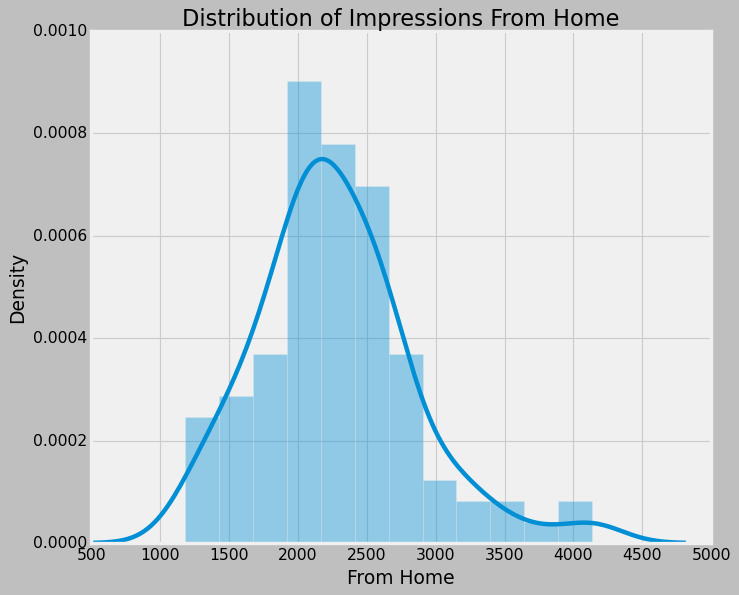

In [23]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

C:\Users\auke3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



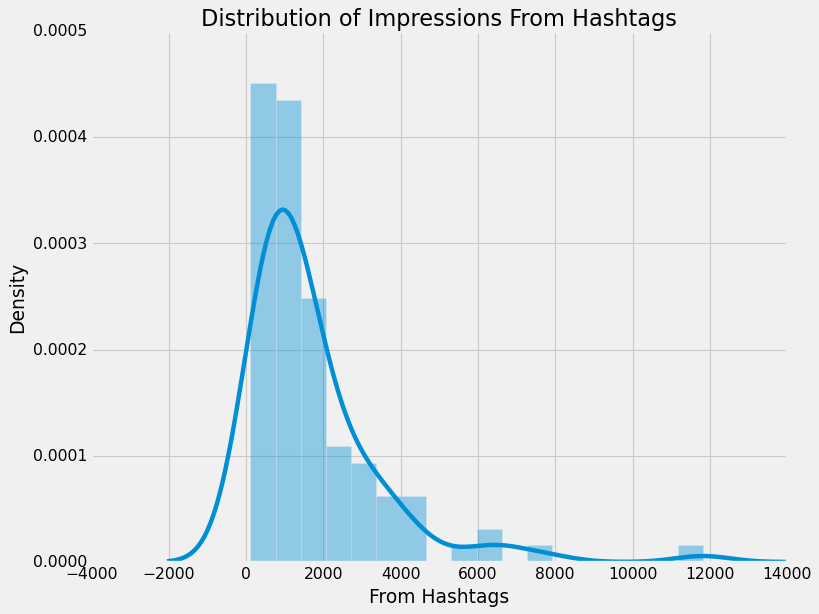

In [24]:
plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\auke3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



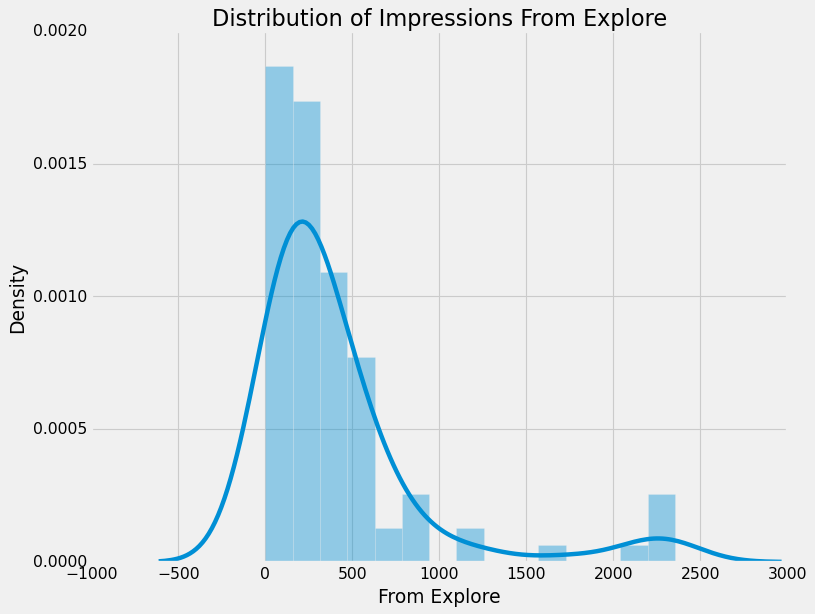

In [25]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [26]:
# Now let's have a look at the percentage of impressions I get from various sources on instagram
home = data['From Home'].sum()
hashtags = data['From Hashtags'].sum()
explore = data['From Explore'].sum()
other = data['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
            title="Impressões em Postagens do Instagram de Várias Fontes", hole=0.5)
fig.show()

# Analyzing Content

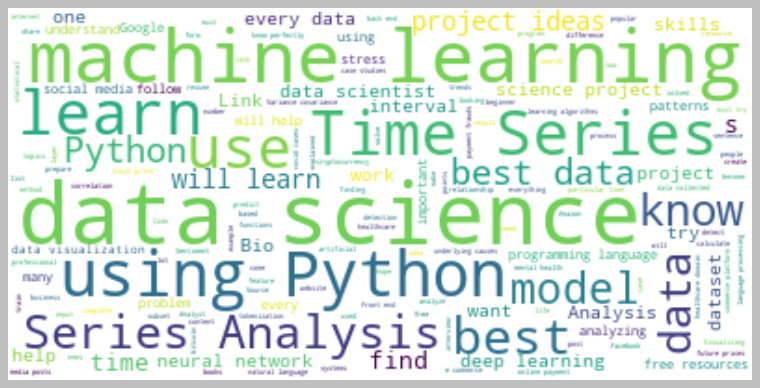

In [30]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

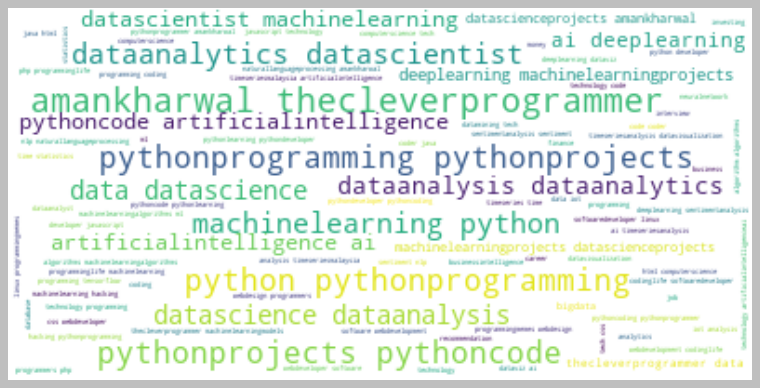

In [32]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analisando relacionamentos - Agora vamos analisar os relacionamentos para encontrar os fatores mais importantes do nosso alcance no Instagram. Também nos ajudará a entender como o algoritmo do Instagram funciona.

In [35]:
# Relacionamento entre o número de likes e o número de impressões no insta
figure = px.scatter(data_frame = data, x = "Impressions",
                       y="Likes", size="Likes", trendline="ols",
                       title= "Relação entre Curtidas e Impressões" )
figure.show()

### Existe uma relação linear entre o número de curtidas e o alcance que obtive no Instagram. Agora vamos ver a relação entre o número de comentários e o número de impressões nas minhas postagens do Instagram

In [38]:
figure = px.scatter(data_frame= data, x="Impressions", y="Comments", size="Comments",
                   trendline="ols", title="Relação entre comentários e total de impressões")
figure.show()

In [40]:
figure = px.scatter(data_frame= data, x="Impressions",
                   y="Shares", size="Shares", trendline="ols",
                   title= "Relação entre compartilhamentos e impressões totais")
figure.show()

In [41]:
figure = px.scatter(data_frame= data, x="Impressions",
                   y="Saves", size="Saves", trendline="ols",
                   title = "Relação entre a postagem salva e o total de impressões")
figure.show()

### Existe uma relação linear entre o número de vezes que minha postagem é salva e o alcance da minha postagem no Instagram. Agora vamos dar uma olhada na correlação de todas as colunas com a coluna Impressões:

In [42]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Home         0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


### Portanto, podemos dizer que mais curtidas e salvamentos ajudarão você a obter mais alcance no Instagram. O maior número de compartilhamentos também ajudará você a obter mais alcance, mas um número baixo de compartilhamentos também não afetará seu alcance.

# Analyzing Conversion Rate

### No Instagram, a taxa de conversação significa quantos seguidores você está recebendo a partir do número de visitas ao perfil de uma postagem. A fórmula que você pode usar para calcular a taxa de conversão é (Seguidores/Visitas ao perfil) * 100. Agora vamos dar uma olhada na taxa de conversação da minha conta do Instagram:

In [43]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 10
print(conversion_rate)

3.117770767613039


### Portanto, a taxa de conversação da minha conta do Instagram é de 31%, o que parece uma taxa de conversação muito boa. Vamos dar uma olhada na relação entre o total de visitas ao perfil e o número de seguidores ganhos de todas as visitas ao perfil:

In [45]:
figure = px.scatter(data_frame=data, x="Profile Visits",
                   y="Follows", size="Follows", trendline="ols",
                   title= "Relação entre visitas ao perfil e seguidores conquistados")
figure.show()

# Instagram Reach Prediction Model

### Agora, nesta seção, treinarei um modelo de aprendizado de máquina para prever o alcance de uma postagem no Instagram. Vamos dividir os dados em conjuntos de treinamento e teste antes de treinar o modelo:### 

In [47]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                  'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

### Agora, veja como podemos treinar um modelo de aprendizado de máquina para prever o alcance de uma postagem no Instagram usando Python:

In [49]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9254313384507039

### Agora vamos prever o alcance de uma postagem no Instagram fornecendo entradas para o modelo de aprendizado de máquina:

In [50]:
# Features = [['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9346.44271211])